In [1018]:
# EDA on 'Titanic.csv'
'''- What is the most important factor in determining survival of the Titanic incident?
- In the movie, the upper-class passengers were given preference on lifeboats. Does this show in the data?
- “Women and children first”. Was this the case?
- Add one other observation that you have noted in the dataset'''
import pandas as pd
import numpy as np
# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns

import matplotlib.pyplot as plt
import missingno

#read file
df = pd.read_csv('Titanic.csv', encoding= 'unicode_escape')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1019]:
# removing unneccesary columns from data
df.drop('Cabin', axis=1, inplace=True)
df.drop('Ticket', axis=1, inplace=True)
df.drop('Embarked', axis=1, inplace=True)
# describing general stats of data
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [1020]:
# data to manipulate without changing the original
df_temp = df

In [1021]:
#missing values count
missing_value_count = df.isnull().sum()
missing_value_count[:]
#Age is missing 177 data values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
dtype: int64

<AxesSubplot: >

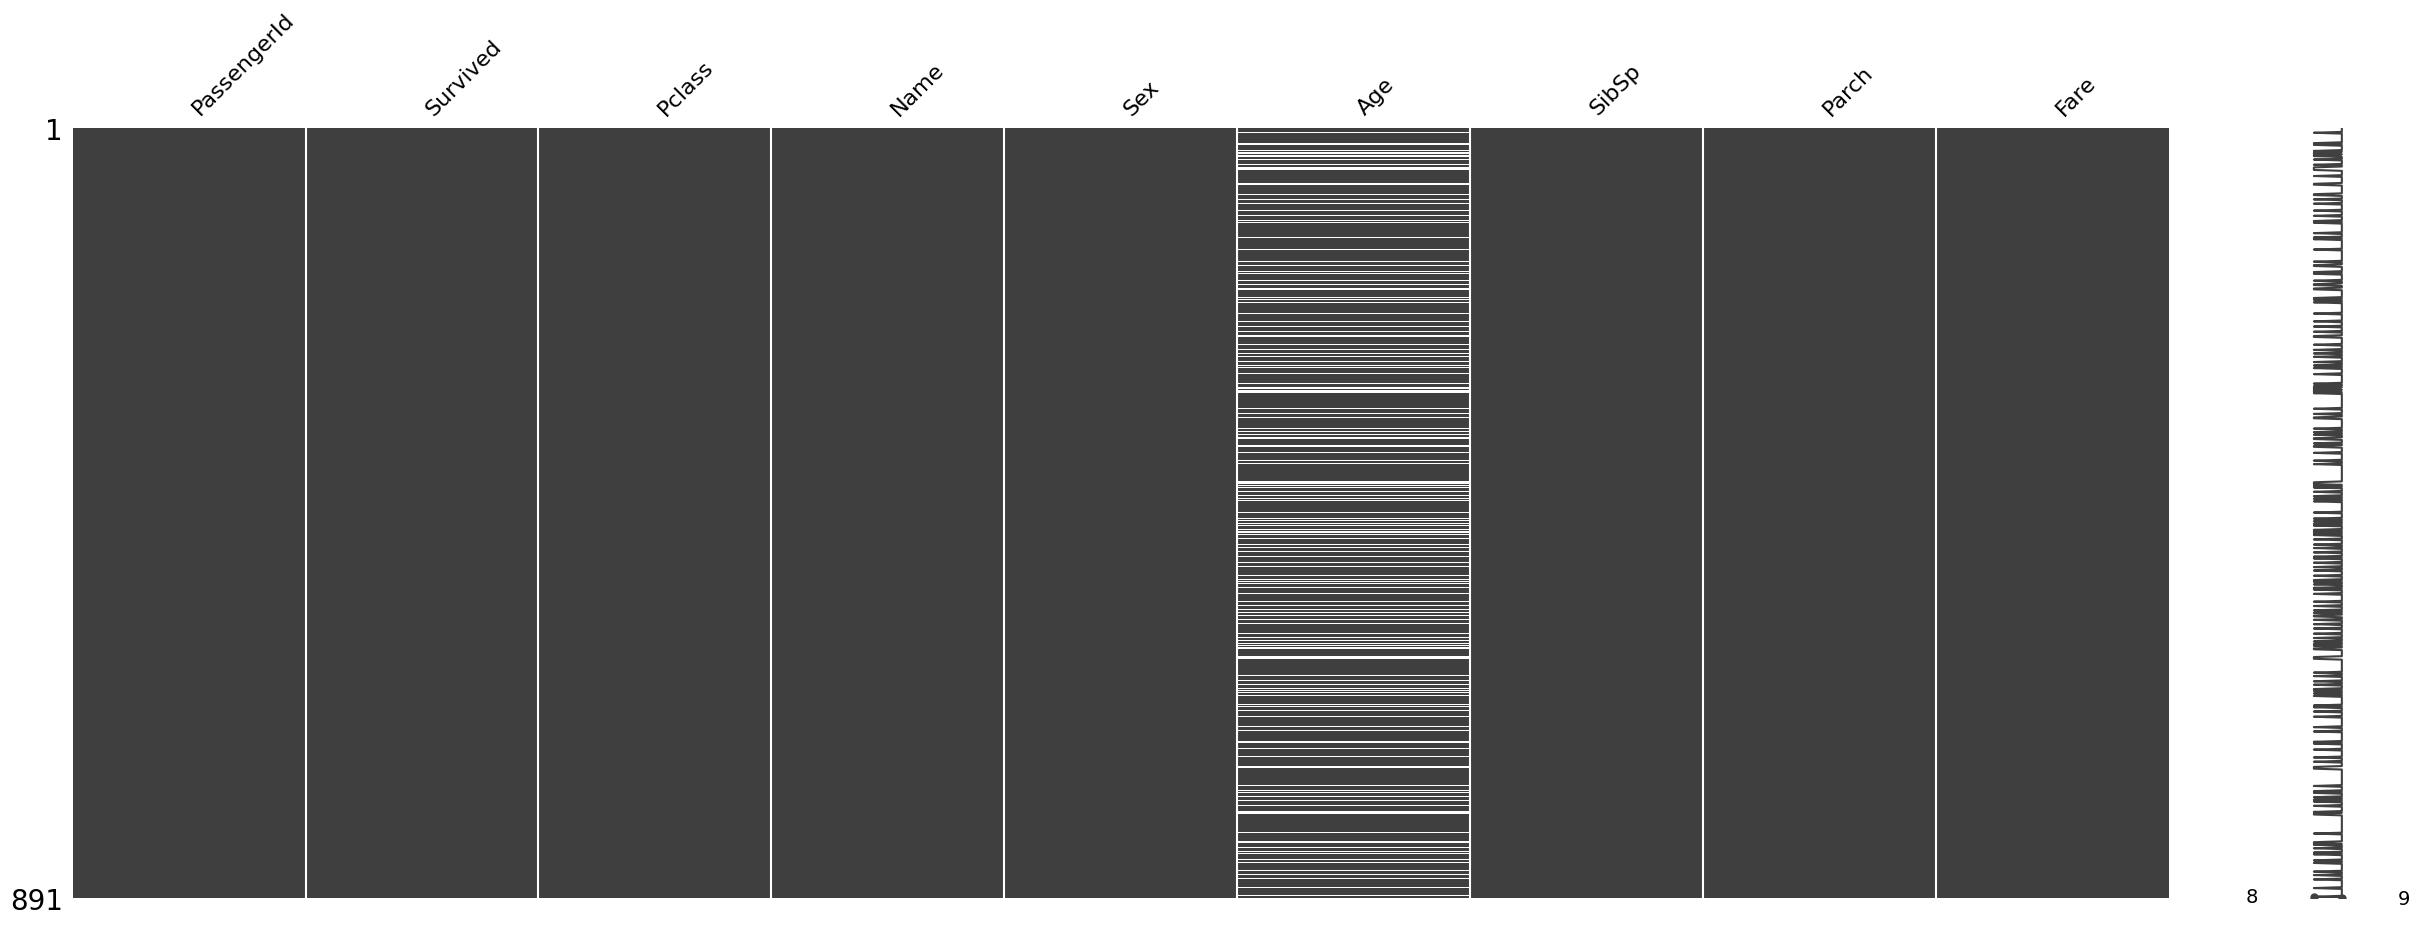

In [1022]:
# plot a matrix to see if there is missing data
missingno.matrix(df, figsize=(30,10))

There appears to be a large number of passengers that we do not know the age of.

0    549
1    342
Name: Survived, dtype: int64


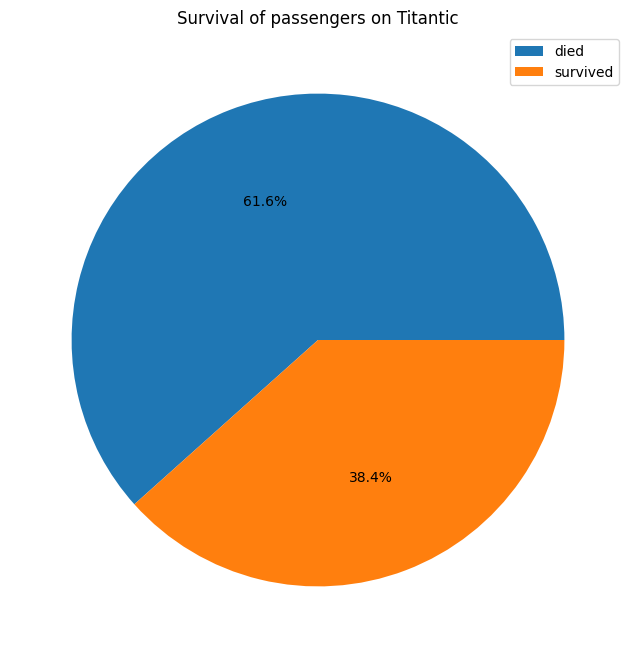

In [1023]:
# how many survived?
df['Survived'].value_counts()
print(df.Survived.value_counts())
# 342 of 891 survived

group_by_survival = df.groupby(by=['Survived'])

survival_count = group_by_survival.count()

count = pd.DataFrame(survival_count.iloc[:,0])

count.plot.pie(subplots=True,autopct='%1.1f%%',figsize=(8, 8),labeldistance=None)
plt.legend(['died', 'survived'])
plt.title('Survival of passengers on Titantic')
plt.ylabel('')
plt.show()
plt.close()

Only 342 people survived (less than 40% of the passengers).
549 died.

"Women and children first”. Was this the case?

male      577
female    314
Name: Sex, dtype: int64


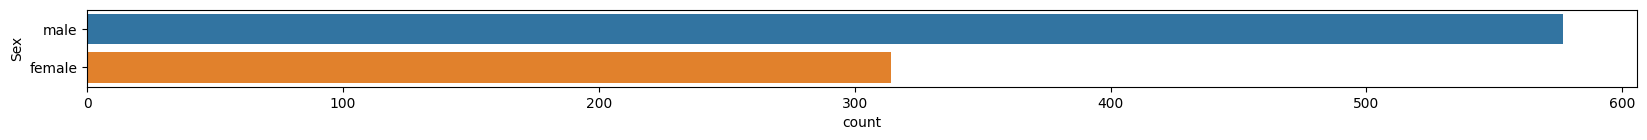

In [1024]:
# how many males vs how many females on the titanic?
fig = plt.figure(figsize=(20,1))
sns.countplot(y='Sex', data=df_temp)
print(df.Sex.value_counts())
#for a pie chart: df['Sex'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()
plt.close()

In [1025]:
# Sort data by age
df['Age'].sort_values()
print(df['Age'].isnull().value_counts())
# 714 data points of 891 available

False    714
True     177
Name: Age, dtype: int64


adult =  601 child =  113


<AxesSubplot: xlabel='count', ylabel='Age_group'>

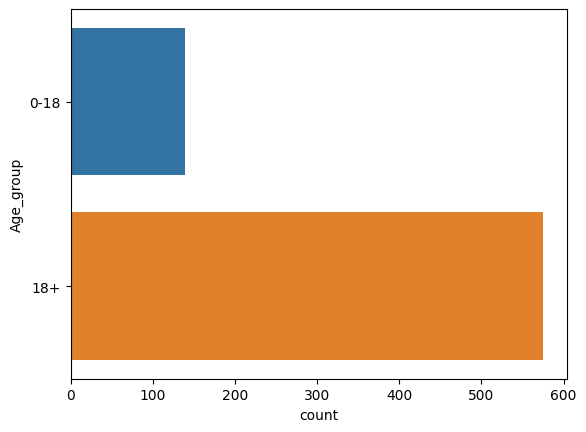

In [1026]:
#how many adults and how many children?
adult = df_temp.Age[df['Age'] >= 18].count()
child = df_temp.Age[df['Age'] < 18].count()
print( 'adult = ', adult,'child = ', child)

# graph ages of passengers
df_temp['Age_group'] = pd.cut(df_temp['Age'], [0, 18, 200], labels=['0-18', '18+'])
fig = plt.figure()
sns.countplot(y=df_temp['Age_group'], data=df_temp)

From the available 714 data points that have the ages of the passengers the majority of passengers were adults. There were only 113 children and 601 adults.

<AxesSubplot: title={'center': 'Children vs adults on the titanic'}, xlabel='Survived', ylabel='Count'>

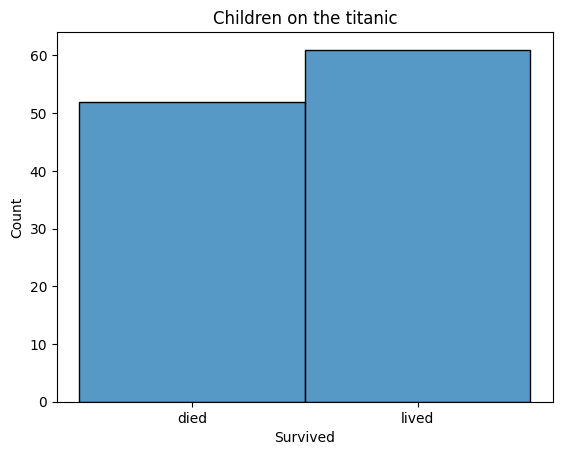

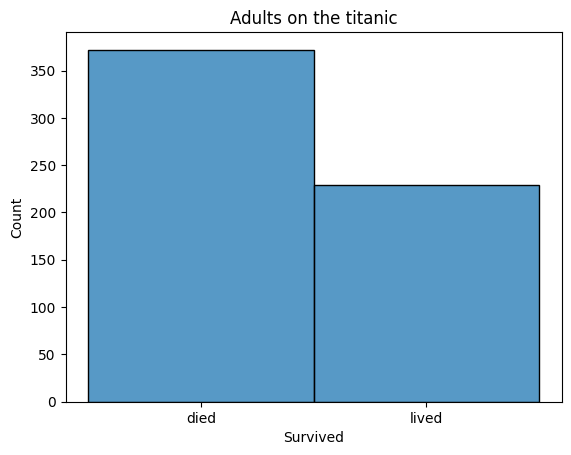

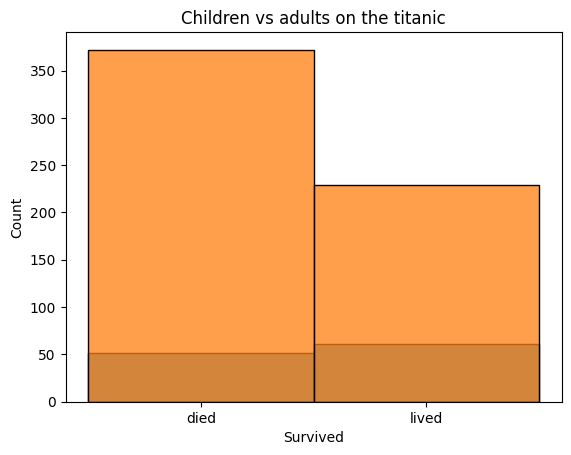

In [1027]:
# survival (0 = died, 1 = survived)
df_temp['Survived'] = df_temp['Survived'].replace([0, 1],['died','lived'])

# children that lived and died
fig = plt.figure()
sns.histplot(data = df_temp.loc[df_temp['Age'] < 18]['Survived'], kde_kws={'label': 'Child'})
plt.title('Children on the titanic')
fig1 = plt.figure()

# adults that lived and died
sns.histplot(data = df_temp.loc[df_temp['Age'] >= 18]['Survived'], kde_kws={'label': 'Adult'})
plt.title('Adults on the titanic')

# compare survival of children and adults on the titanic
fig2 = plt.figure()
plt.title('Children vs adults on the titanic')
sns.histplot(data = df_temp.loc[df_temp['Age'] < 18]['Survived'], kde_kws={'label': 'Child'})
sns.histplot(data = df_temp.loc[df_temp['Age'] >= 18]['Survived'], kde_kws={'label': 'Adult'})

It seems that just over 50% of the children aboard the Titanic survived and only about 45% of the adults survived.
Both children and adults saw a great loss of life.
This suggests that "Women and children first" was followed to an extent, however, not all the children were put first.

<AxesSubplot: title={'center': 'Male survival on the titanic'}, xlabel='Survived', ylabel='Count'>

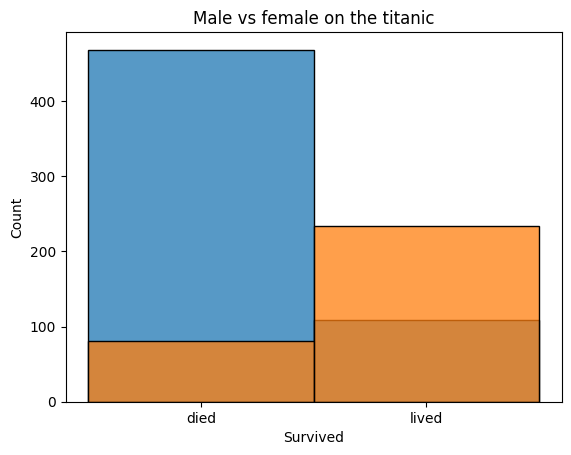

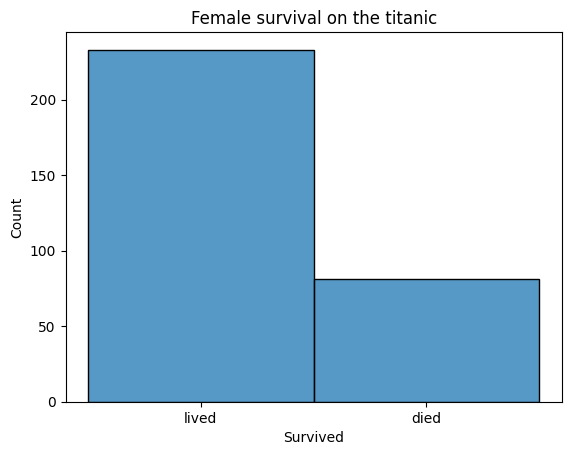

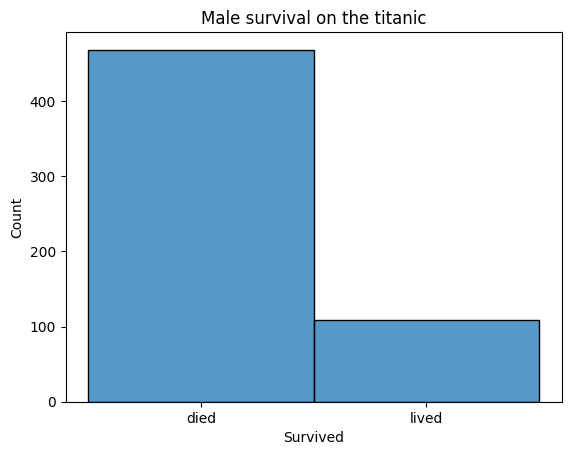

In [1028]:
# compare sex survival rates on the titanic
figure = plt.figure()
plt.title('Male vs female on the titanic')
sns.histplot(df.loc[df['Sex'] == 'male']['Survived'], kde_kws={'label': 'male'})
sns.histplot(df.loc[df['Sex'] == 'female']['Survived'], kde_kws={'label': 'female'})
# female survival
figure1 = plt.figure()
plt.title('Female survival on the titanic')
sns.histplot(df.loc[df['Sex'] == 'female']['Survived'], kde_kws={'label': 'female'})
# male survival
figure2 = plt.figure()
plt.title('Male survival on the titanic')
sns.histplot(df.loc[df['Sex'] == 'male']['Survived'], kde_kws={'label': 'male'})

Females aboard the titanic = 314
Males aboard the titanic = 577
Many more females (approx. 240 survived) survived than males (approx. 110).
Less than 1/3 of the females aboard the titanic died, whereas about 4 times the number of males that survived (approx.110) the titanic died (approx.480).
The number of males that died (approx. 480) was about 5 times the number of females that died (approx. 75).
The number of females that survived (approx. 240) was about double the number of males that survived (approx. 110).
It seems that "Women and children first" was followed to an extent, however, not all women were put first.

Therefore, "Women and children first" was only followed to an extent as not all the women and children survived and there were still many men who survived.

In the movie, the upper-class passengers were given preference on lifeboats. Does this show in the data?

3    491
1    216
2    184
Name: Pclass, dtype: int64


<AxesSubplot: title={'center': 'Passenger class and survival on the titanic'}, xlabel='Survived', ylabel='Count'>

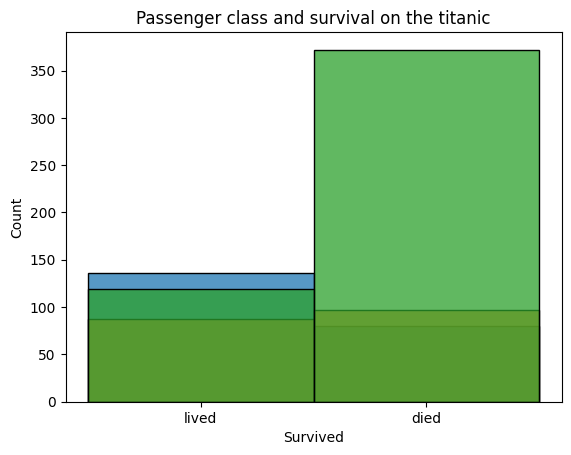

In [1043]:
# Comparing survival rates of passenger classes
print(df.Pclass.value_counts())
figure = plt.figure()
plt.title('Passenger class and survival on the titanic')
sns.histplot(df.loc[df['Pclass'] == 1]['Survived'], kde_kws={'label': '1'})
sns.histplot(df.loc[df['Pclass'] == 2]['Survived'], kde_kws={'label': '2'})
sns.histplot(df.loc[df['Pclass'] == 3]['Survived'], kde_kws={'label': '3'})

Passenger class 1 had 216 people of which approx. 137 lived and approx. 79 died.
Passenger class 2 had 184 people of which approx. 87 lived and approx. 97 died.
Passenger class 3 had 491 people of which approx. 121 lived and approx. 370 died.
Passenger class 3 had the majority of the passengers.
Passenger class 2 had the minority of the passengers.
Approximately the same number of people from each class got to survive, although class 1 had about 15 more people that survived than class 3 and class 2 had about 30 people less than class 3 that survived.
The minority of class 1 died. A smaller majority of class 2 died. A great majority of class 3 died.
A great deal more of the passengers from passenger class 3 died than the other passenger classes.


271      0.0000
597      0.0000
302      0.0000
633      0.0000
277      0.0000
         ...   
438    263.0000
341    263.0000
737    512.3292
258    512.3292
679    512.3292
Name: Fare, Length: 891, dtype: float64
upper payers =  240 lower payers =  651


<AxesSubplot: title={'center': 'Passenger fare and survival on the titanic'}, xlabel='Survived', ylabel='Count'>

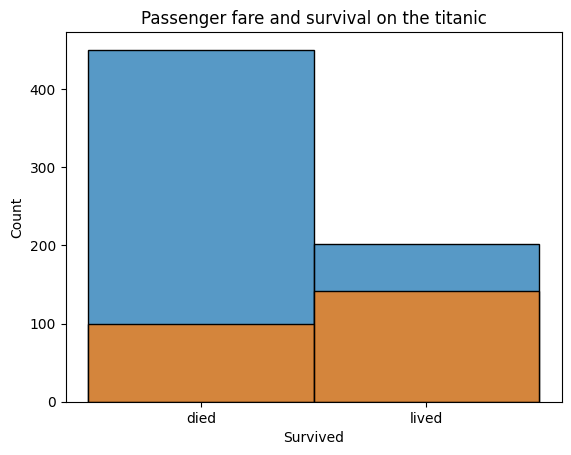

In [1058]:
# Comparing survival rates of passengers with fares
print(df['Fare'].sort_values())
# fees between 0 and 513

# count of upper and lower fee payers
upper = df.Fare[df['Fare'] >= 30].count()
lower = df.Fare[df['Fare'] < 30].count()
print( 'upper payers = ', upper,'lower payers = ', lower)

# graph
figure = plt.figure()
plt.title('Passenger fare and survival on the titanic')
sns.histplot(data = df.loc[df['Fare'] < 30]['Survived'], kde_kws={'label': 'lower payers'})
sns.histplot(data = df.loc[df['Fare'] >= 30]['Survived'], kde_kws={'label': 'upper payers'})

There were approximately 240 upper class fare payers(who paid equal to or more than 30) and approximately 651 lower class fare payers(who paid less than 30).
Of the lower class fare payers about 455 died and 196 survived. Of the upper class fare payers about 140 survived and 100 died.
One had a much greater chance of surviving if one belonged to the upper class of fee payers.

Therefore, the figures show that if you were part of the upper class you had a higher likelihood of surviving and a lower likelihood of survival from the lower classes. Thus the statistics support the movie in that the upper class were given preference on lifeboats. The fact, however, remains that people from all classes and fares still died.

Observation

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


<AxesSubplot: title={'center': 'Passenger survival based on how many siblings/spouses they were travelling with on the titanic'}, xlabel='Survived', ylabel='Count'>

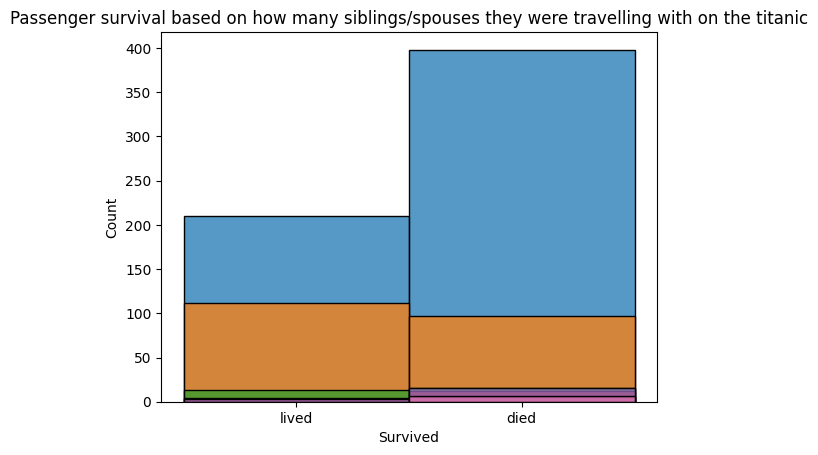

In [1032]:
# Comparing survival rates of passengers that had family aboard with them
print(df_temp.SibSp.value_counts())
figure = plt.figure()
plt.title('Passenger survival based on how many siblings/spouses they were travelling with on the titanic')
sns.histplot(data = df.loc[df_temp['SibSp'] == 0]['Survived'], kde_kws={'label': '0'})
sns.histplot(data = df.loc[df_temp['SibSp'] == 1]['Survived'], kde_kws={'label': '1'})
sns.histplot(data = df.loc[df_temp['SibSp'] == 2]['Survived'], kde_kws={'label': '2'})
sns.histplot(data = df.loc[df_temp['SibSp'] == 3]['Survived'], kde_kws={'label': '3'})
sns.histplot(data = df.loc[df_temp['SibSp'] == 4]['Survived'], kde_kws={'label': '4'})
sns.histplot(data = df.loc[df_temp['SibSp'] == 5]['Survived'], kde_kws={'label': '5'})
sns.histplot(data = df.loc[df_temp['SibSp'] == 8]['Survived'], kde_kws={'label': '8'})


Majority of passengers had no Siblings/Spouses Aboard.
Of the 608 passengers that had no SibSp approx. 400 died and approx. 210 survived. Of the 209 passengers with 1 SibSp approx. 95 died and approx. 110 survived. Of the 28 passengers that had 2 SibSp approx. 15 died and 13 survived. Of the 16 passengers that had 3 SibSp 12 died and 4 lived. Of the 18 passengers that had 4 SibSp 15 died and 3 lived. Of the 5 passengers that had 5 SibSp 5 died and 0 lived. Of the 7 passengers that had 8 SibSp 8 died and 0 lived.

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


<AxesSubplot: title={'center': 'Passenger survival based on how many parents/children they were travelling with on the titanic'}, xlabel='Survived', ylabel='Count'>

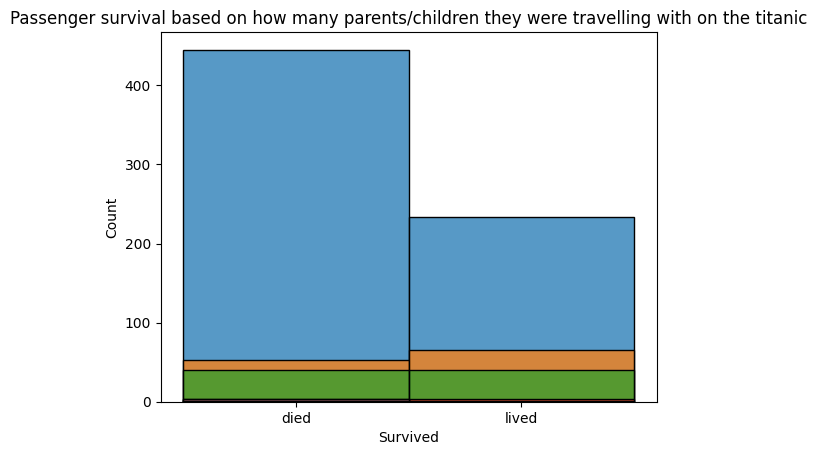

In [1041]:
# Comparing survival rates of passengers that had family aboard with them
print(df_temp.Parch.value_counts())
figure = plt.figure()
plt.title('Passenger survival based on how many parents/children they were travelling with on the titanic')
sns.histplot(data = df.loc[df_temp['Parch'] == 0]['Survived'], kde_kws={'label': '0'})
sns.histplot(data = df.loc[df_temp['Parch'] == 1]['Survived'], kde_kws={'label': '1'})
sns.histplot(data = df.loc[df_temp['Parch'] == 2]['Survived'], kde_kws={'label': '2'})
sns.histplot(data = df.loc[df_temp['Parch'] == 3]['Survived'], kde_kws={'label': '3'})
sns.histplot(data = df.loc[df_temp['Parch'] == 4]['Survived'], kde_kws={'label': '4'})
sns.histplot(data = df.loc[df_temp['Parch'] == 5]['Survived'], kde_kws={'label': '5'})
sns.histplot(data = df.loc[df_temp['Parch'] == 6]['Survived'], kde_kws={'label': '6'})

Majority of passengers had no parents/children aboard.
Of the 678 passengers to have no Parch aboard approx. 450 died and 240 survived. Of the 118 passengers that had 1 Parch aboard approx. 53 died and 65 survived. Of the 80 passengers aboard that had 2 Parch 40 died and 40 survived. Of the 5 passengers aboard that had 3 Parch 2 died and 3 survived. Of the 4 passengers aboard that had 4 Parch 4 died and 0 survived. Of the 5 passengers aboard that had 5 Parch 4 died and 1 survived. Of the 1 passengers aboard that had 6 Parch 1 died and 0 survived.

It appears that the passengers that travelled with their families onboard were all more likely to die, especially if they had a large family. Despite this many people travelling alone also died.

What is the most important factor in determining survival of the Titanic incident?

It is difficult to say which factor was most important as many factors played a role in determining survival.
The factors that were most influential were: Sex, Fare and Age. Other factors also contributed.
And a majority of the women and children aboard survived. A great deal more women survived than men. The majority of men died, while the majority of women survived.
The majority of survivors were from small families. Those who paid higher fares (from the upper class) were also more likely to survive.
Thus, you would most likely to survive if you were a young female from a small family that paid for an upper class fare.